# Ecuaciones diferenciales de segundo orden con valores a la frontera.
Eva Martínez Palafox

Los problemas de valor a la frontera son aquellos donde se tienen ecuaciones diferenciales de segundo orden y se conocen los valores inicial y final. 

## Método del disparo.
Si tenemos una ecuación de segundo orden:
$$
y'' = f(x,y,y')
$$
y conocemos los valores de y en los extremos:

\begin{align*} 
y(x_i) &= a \\
y(x_f) &= b
\end{align*}

Se toma un valor arbitrario para $y'(x_i)=z_1$ (en este caso, $z_1$ es la pendiente entre los puntos de las fronteras y $z_2$ es $z_1 + 0.2z_1$) y se resuelve como un problema de valor inicial (usando Euler o Runge-Kutta) y se obtiene un valor final $y(x_f)^1$. Si este valor es distinto al deseado, se toma un valor nuevo $y'(x_i)=z_2$.


Se resuelve nuevamente el problema con la nueva condición inicial. Si el valor nuevo es distinto de la solución deseada, es decir $y(x_f)^2 \neq b$, se calcula de nuevo la condición inicial. 

El nuevo valor de $z_2$ se encuentra haciendo un ajuste lineal entre los puntos ($z_1, w_1$) y ($z_2, w_2$), donde $w_1$ y $w_2$ son estimaciones del valor de $y$ en la frontera derecha, obtenidos de resolver las ecuaciones con valores iniciales $y_1'(x_i) = z_1$ y $y_2'(x_i) = z_2$.
Si no se alcanza la solucion, el nuevo valor de $z_1$ es el valor anterior de $z_2$. Con el nuevo valor inicial se resuelve el problema o se repite el procedimiento. 


### Resolver la siguiente ecuación usando el  método del disparo.

$$
\frac{d^2y}{dx^2} + \frac{dy}{dx} = cos(x)
$$
En el intervalor [0, 2] y sabiendo que y(0) = 0, y(2) = 5. Usar paso h = 0.5.


In [185]:
# Paquetes y constantes.
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint # para resolver las de 1er orden.

In [186]:
def shoot( f, a, b, z1, z2, t):
    """Implementación del método del disparo (shooting method)

    Recibe:
        f     - La Funcion dy/dt = f(y,x).  Since we are solving a second-
                order boundary-value problem that has been transformed
                into a first order system, this function should return a
                1x2 array with the first entry equal to y and the second
                entry equal to y'.
        a     - valor en la frontera izquierda: a = y(t[0]).
        b     - valor en la frontera derecha: b = y(t[n-1]).
        z1    - primer valor (estimado) de la pendiente  y'(t[0]).
        z2    - segundo valor (estimado) de la pendiente y'(t[0]).
        t     - arreglo de las x's, aqui defines tu paso.
        
    Regresa:
        y     - el arreglo que contiene la solución para cada x.

    Notar:
        Primero hay que convertir la EDO de 2o orden con valores a la frontera 
        en un sistema de dos ecuaciones de primer orden, 
        esto está en la función Funcion.
    """
    tol = 1e-6      # tolerancia, que tanto lo dejamos alejarse de la frontera 
                    # derecha para considerar que ya terminó.
    max_iter = 25   # Número máximo de disparos. 
    n = len(t)      # Tamaño de los arreglos, depende de las x y el paso.

    # Primer intento de hallar la solución con y'(a) = z1.
    y = odeint(Funcion, [a,z1],t)
    #y = RK45(Funcion, [a,z1], t)
    w1 = y[n-1,0]              #guardamos el último valor de la sol.
                               # a ver si se parece a b...

    print ("%2d: z = %10.3e, error = %10.3e" % (0, z1, b - w1))

    # Calcula la solución otra vez, luego usa las dos estimaciones para 
    # refinar el cálculo de y'(a). La segunda solución reemplaza a la primera 
    # y se calcula una nueva solución.
    # El proceso continua hasta que se soluciona la ecuación dentro 
    # de la tolerancia o se pasa del número de iteraciones. 

    for i in range(max_iter):

        # Resuelve el segundo problema de valor inicial con y'(a) = z2.  
        y = odeint(Funcion,[a,z2],t)        
        w2 = y[n-1,0]

        print ("%2d: z = %10.3e, error = %10.3e"%( i+1, z2, b - w2 ))

        # A ver si ya le salió...  
        if abs( b - w2 ) < tol:
            break

        z1, z2 = ( z2, z2 + ( z2 - z1 ) / ( w2 - w1 ) * ( b - w2 ) )        
        w1 = w2

    if abs( b - w2 ) >= tol:
        print ("\n**** TRAAAN ****")
        print ("Ya se pasó de (%d) disparos!" % max_iter)
        print ("El error en la solución es %e :" % ( b - w2 ))

    return y[:,0]


In [187]:
# Reescribimos la EDO de 2o orden como un sistema de ecuaciones de 1ero. 
# Una función que representa a las ecuaciones diferenciales acopladas
# con valores iniciales falsos =P
def Funcion(Y,t):
    w1 = Y[0]
    w2 = Y[1]
    dw1dt = w2
    dw2dt = -dw1dt + np.cos(t)
    return (dw1dt,dw2dt) #regresa y', y'' 

Y = [a,z1]
a = 0
b = 5
t = np.linspace(0,2,5)
#print(x)
z1 = (b-0)/(2-0)  #la pendiente entre las fronteras.
z2 = 3.0          #la pendiente+20% entre las fronteras.
#print(z1)
y =shoot( Funcion, a, b, z1, z2, t)

#plt.plot(t,y)
#plt.grid()

 0: z =  2.500e+00, error =  2.108e+00
 1: z =  3.000e+00, error =  1.676e+00
 2: z =  4.938e+00, error =  1.002e-08


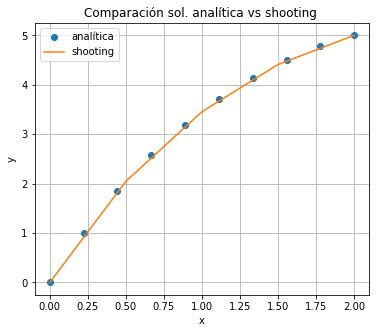

In [188]:
# Sol. analítica aprox. para comparar
x = np.linspace(0,2,10)
sol_a = (0.0782588*2.71828**(-x))*(-2.71828**x + 8.67456*2.71828**(x + 2) - 2.71828**x*np.sin(x) \
                               + 2.7182**(x + 2)*np.sin(x) + 2.71828**x*np.cos(x) - 2.71828**(x + 2)*np.cos(x) \
                               - 56.7077)
# ------------------------------------------------------------
plt.rcParams['figure.figsize'] = [6,5]
plt.plot(x,sol_a,'o', label='analítica') 
plt.plot(t,y, label='shooting')
plt.title('Comparación sol. analítica vs shooting ')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

## Método de diferencias finitas.

Para resolver numéricamente EDO de segundo orden con valores a la frontera, sin convertirlas en un sistema de EDOs de primer orden, se utiliza el método de las diferencias finitas, donde se calculan las derivadas de y(x) de forma numérica. Si el problema por resolver es del tipo:

$$
y'' = p(x)y' + q(x)y +r(x) 
$$

con $x$  $\epsilon$  $[a,b]$   y valores a la frontera   $y(a)=\alpha$ , $y(b)=\beta$.


El método, de forma general, consisten en lo siguiente. Sea $a+x_0 < x_1 < ... < x_N < x_(N+1) = b$ una partición uniforme de paso $h=\frac{b-a}{N+1}$, luego de agrupar y multiplicar por $h^2$ se tiene el sistema de ecuaciones:
\begin{align*}
y_0      &= \alpha \\
(1+\frac{h}{2}p_n)y_{n-1} - (2 + h^2q_n)y_n +(1-\frac{h}{2}p_n) y_{n+1}  &=  h^2r_n \quad  n = 1,...,N \\
y_{N+1}  &= \beta 
\end{align*}

que queda de forma matricial  $\mathbf{A}\cdot\mathbf{Y} = h^2 \mathbf{r}-\mathbf{c}$, donde $\mathbf{A}$ es la matriz de coeficientes, $\mathbf{r}$ la matriz de términos independientes y $\mathbf{Y}$ la matriz de incógnitas.

\begin{equation}
\mathbf{A}=\begin{pmatrix}
-b_1 & c_1 & 0 & ... & 0\\
 a_2 &-b_2 &c_2& ... & 0\\
 \vdots &\ddots&\ddots &\ddots &\vdots\\
 0 & ... &a_{N-1}&-b_{N-1}& c_{N-1}\\
 0& ... & 0 &a_N& -b_N
\end{pmatrix} ,\quad
\mathbf{Y}=\begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_{N-1} \\
y_N
\end{pmatrix},\quad 
\mathbf{r}=\begin{pmatrix}
r_1\\
r_2\\
\vdots\\
r_{N-1} \\
r_N
\end{pmatrix},\quad 
\mathbf{c}=\begin{pmatrix}
\alpha a_1\\
0\\
\vdots\\
0 \\
\beta c_N
\end{pmatrix}
\end{equation}

donde, $a_n = 1+\frac{h}{2}p_n$, $b_n=2+h^2q_n$, $c_n=1-\frac{h}{2}p_n$. 

### Resolver por el método de las diferencias finitas la siguiente ecuacion diferencial,

$$
y'' + y' + y = x - \frac{xy}{5}
$$
en el intervalo $[1, 3]$ y sabiendo que $y(1) = 2$  y $y(3)=-2$.  Usar un paso de h = 0.5.

Podemos reescribir la ecuación como:
$$
y'' = -y' - (1+\frac{x}{5}) y +x
$$
o bien 
$$
y'' = u(x) + v(x) y + w(x) y'
$$
donde u, v, w son funciones de x o escalares. 
\begin{align*}
u(x) &= x \\
v(x) &= -1-\frac{1}{5} x \\
w(x) &= -1
\end{align*}

Vamos a resolver un sistema de n ecuaciones lineales con n-2 incógnitas. Donde n esta dado por el tamaño del paso elegido, mientras más precisión usemos más ecuaciones habrá que resolver.

In [169]:
def dif_fin( u, v, w, x, a, b ):
    """Resuelve por diferencias finitas una edo de 2o oden
    con valores a la frontera como:

        y'' = u(x) + v(x) y + w(x) y'
        y(x[0]) = a, y(x[n-1]) = b

    Recibe:
        u,v,w - arreglo que contienen las funciones u(x), v(x), y w(x).
                o escalares, los convertimos en np.arrays.
        x     - de n valores donde hallar las y's.
        a     - valor en la frontera izquierda: a = y(x[0]).
        b     - valor en la frontera derecha: b = y(x[n-1]).

    Regresa:
        y     - el arreglo con la solución de la edo. 
    """

    if type(x) != np.ndarray:
        if type(x) == list:
            x = np.array(x)
        else:
            x = np.array([float(x)])

    n = len(x) #numero de puntos donde se calcularan las y's.

    #convertimos u,v,w en arreglos de n-elementos
    if type(u) == int or type(u) == float:
        u = np.array([float(u)]*n)

    if type(v) == int or type(v) == float:
        v = np.array([float(v)]*n)

    if type(w) == int or type(w) == float:
        w = np.array([float(w)]*n)

    # Tamaño del paso. Esto define el tamaño del sistema de eqs.
    # lo definimos por fuera, según como mandes el arreglo de las x's.
    h = x[1] - x[0];
    print('\nTamaño del paso, h = ',h, '\n')

    # Se construye el sistema tridiagonal; 
    # Las condiciones a la frontera son la primer
    # y última ecuación del sistema.

    A = -(1.0 + w[1:n] * h/2.0)
    A[-1] = 0.0

    C = -(1.0 - w[0:n-1] * h/2.0)
    C[0] = 0.0

    D = 2.0 + h * h * v
    D[0] = D[n-1] = 1.0

    B =-h*h*u
    B[0]=a    #izquierda
    B[n-1]=b  #derecha

    # Resolviendo el sistema tridiagonal
    for i in range(1, n):
        ymult = A[i-1] / D[i-1]
        D[i] = D[i] - ymult * C[i-1]
        B[i] = B[i] - ymult * B[i-1]

    y = np.zeros(n)  
    y[n-1] = B[n-1] / D[n-1]

    for i in range(n-2,-1,-1):
        y[i] = ( B[i] - C[i] * y[i+1] ) / D[i]

    return y

In [170]:
# en el intervalo [1, 3] y sabiendo que y(1) = 2 & y(3)=-2.  Usar un paso de h = 0.1
a=2
b=-2

x=np.linspace(1,3,5) 
print(x)

[1.  1.5 2.  2.5 3. ]



Tamaño del paso, h =  0.5 



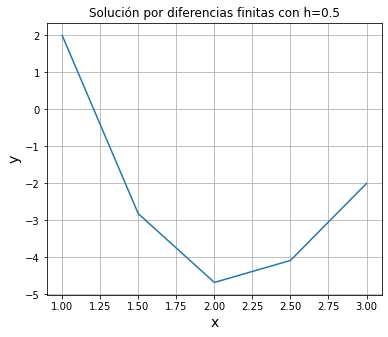

In [183]:
u= x
v= -1-0.2*x
w= -1

y_df = dif_fin( u, v, w, x, a, b )
plt.plot(x,y_df)
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.title('Solución por diferencias finitas con h=0.5')
plt.grid()

## <font color='red'>Punto extra: usando paso de h=0.1 </font>


In [175]:
# en el intervalo [1, 3] y sabiendo que y(1) = 2 & y(3)=-2.  Usar un paso de h = 0.1
a=2
b=-2

x1=np.linspace(1,3,21) 
print(x1)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3. ]



Tamaño del paso, h =  0.10000000000000009 



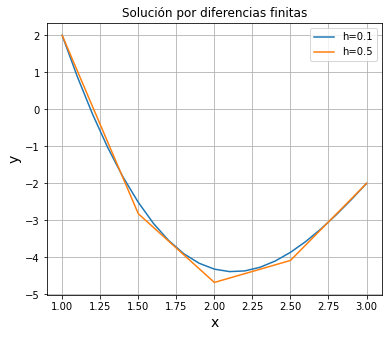

In [184]:
u= x1
v= -1-0.2*x1
w= -1

y_df1 = dif_fin( u, v, w, x1, a, b )

plt.plot(x1,y_df1, label='h=0.1')
plt.plot(x,y_df, label='h=0.5')
plt.legend()
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.title('Solución por diferencias finitas')
plt.grid()